In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

os.environ['NUMEXPR_MAX_THREADS'] = '20'
from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune

from alphabase.spectral_library.flat import SpecLibFlat
from alphabase.spectral_library.base import SpecLibBase
from alphabase.spectral_library.reader import SWATHLibraryReader

from alphadia.extraction.data import TimsTOFDIA
from alphadia.extraction.planning import Plan, Workflow
from alphadia.extraction.calibration import RunCalibration
from alphadia.extraction.candidateselection import MS1CentricCandidateSelection
from alphadia.extraction.scoring import fdr_correction, MS2ExtractionWorkflow
import alphadia.extraction.utils as utils
yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8_01_S4-E8_1_644.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8_02_S4-E9_1_645.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8_03_S4-E10_1_646.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_AID8_04_S4-F2_1_649.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_01_S4-E2_1_636.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_02_S4-E5_1_639.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_03_S4-E11_1_647.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_04_S4-F3_1_650.d'

             ]

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_03_02_MCT_scp_hela'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:02.604826  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_jqg8s481. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 1,253,966,761,984
0:00:02.605512  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:02.605781  INFO: 
0:00:05.136395  INFO: Cupy is not available
0:00:05.319432  ERROR: NEPTUNE_TOKEN environtment variable not set


0:00:20.175717  PROGRESS:       _   _      _         ___ ___   _   
0:00:20.176130  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:20.176380  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:20.176674  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:20.176871  PROGRESS:            |_|                            
0:00:20.177039  PROGRESS: 
0:00:20.177510  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:20.182472  PROGRESS: version: 1.0.1
0:00:20.182816  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:20.183074  PROGRESS: date: 2023-03-02 12:12:14
0:00:22.141174  INFO: renaming precursor_columns columns
0:00:22.142083  INFO: renaming fragment_columns columns
0:00:22.142479  INFO: ========= Library Stats =========
0:00:22.142713  INFO: Number of precursors: 89,996
0:00:22.154750  INFO: 	thereof targets:45,868
0:00:22.155160  INFO: 	thereof decoys: 44,128
0:00:22.156556  INFO:

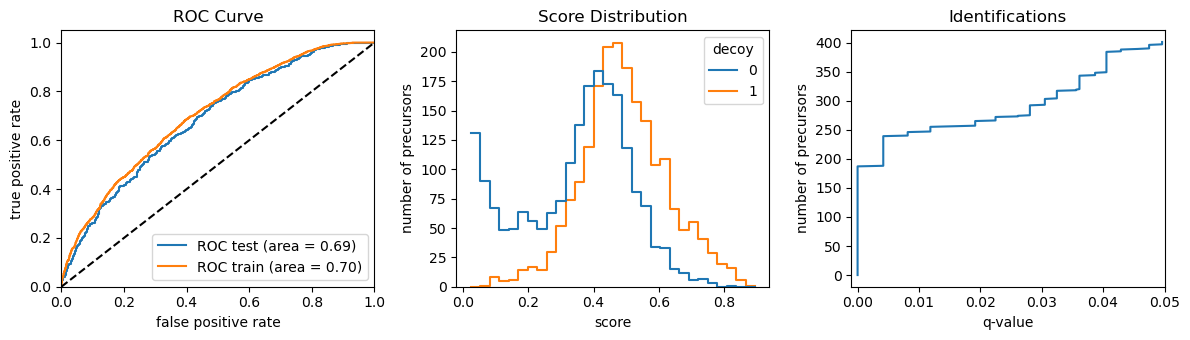

0:03:01.155113  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:03:01.157261  PROGRESS: Accumulated precursors: 3,993, 0.01 FDR: 247, 0.001 FDR: 188
0:03:01.157612  PROGRESS: === Epoch 0, step 1, extracting elution groups 4000 to 8000 ===
0:03:01.159839  PROGRESS: MS1 error: 120, MS2 error: 120, RT error: 360, Mobility error: 0.06
0:03:01.161018  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:03:01.161302  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:03:01.161530  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:03:01.161794  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7988/7988 [00:00<00:00, 12386.78it/s]
0:04:30.736886  INFO: Scored 7988 candidates
0:04:30.741909  INFO: 0.10% of targets failed, 0.17% of decoys failed
0:04:30.809702  INFO: number of dfs in features: 2, total number of features: 15959


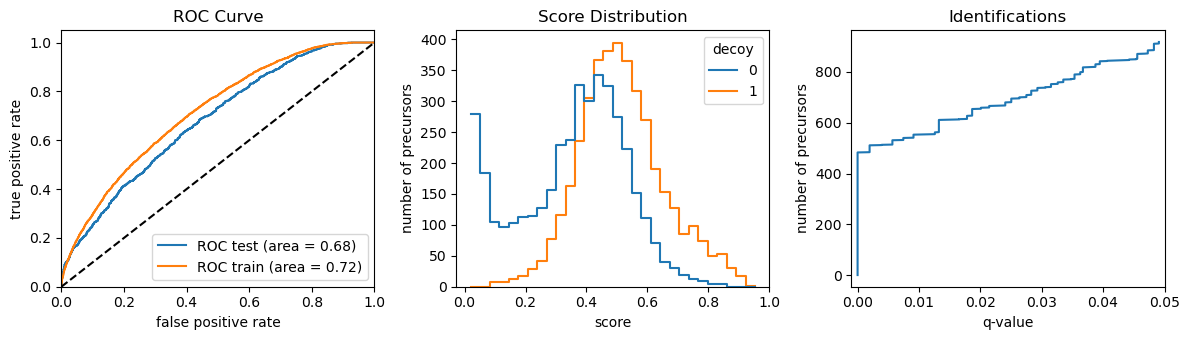

0:04:32.452047  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:04:32.452372  PROGRESS: Accumulated precursors: 7,982, 0.01 FDR: 554, 0.001 FDR: 484
0:04:32.453073  INFO: calibration group: precursor, fitting mz estimator 


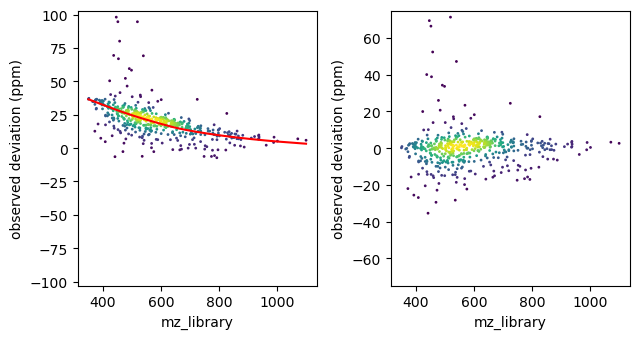

0:04:32.564190  INFO: calibration group: precursor, fitting rt estimator 


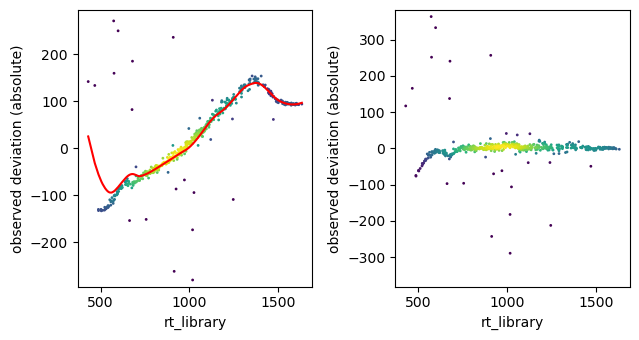

0:04:32.658982  INFO: calibration group: precursor, fitting mobility estimator 


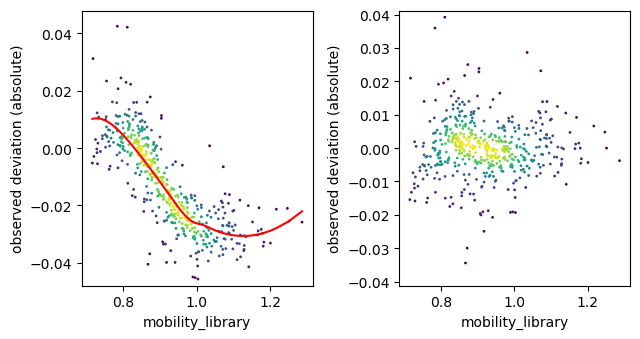

0:04:32.757023  INFO: calibration group: fragment, fitting mz estimator 


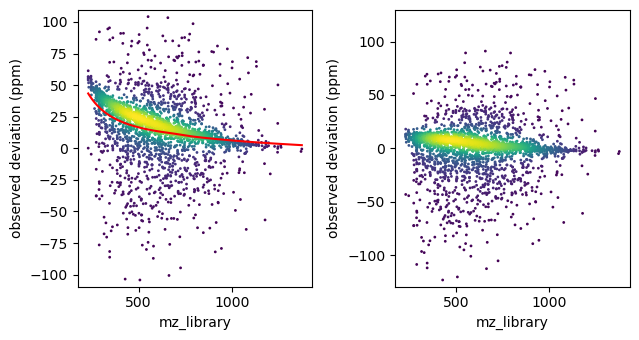

0:04:32.942206  INFO: calibration group: precursor, predicting mz
0:04:32.952246  INFO: calibration group: precursor, predicting rt
0:04:32.979715  INFO: calibration group: precursor, predicting mobility
0:04:32.993281  INFO: calibration group: fragment, predicting mz
0:04:33.100335  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:04:33.108328  PROGRESS: MS1 error: 19.032035731168087, MS2 error: 54.97568379514094, RT error: 41.93737494793216, Mobility error: 0.03
0:04:33.109854  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:33.110133  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:33.110406  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:04:33.110656  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7959/7959 [00:00<00:00, 12314.35it/s]
0:05:10.450407  INFO: Scored 7959 candidates
0:05:10.456130  INFO: 0.10% of targets failed, 0.81% of decoys failed
0:05:10.51303

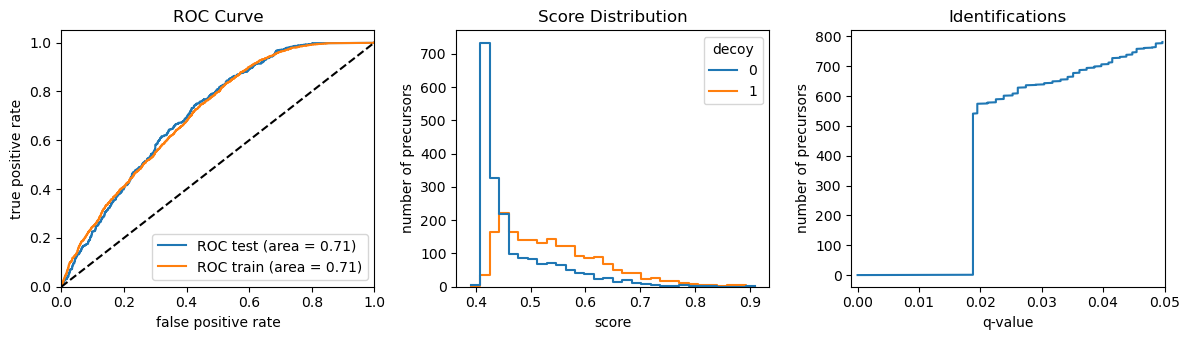

0:05:10.925966  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:05:10.926267  PROGRESS: Accumulated precursors: 3,971, 0.01 FDR: 1, 0.001 FDR: 1
0:05:10.926497  PROGRESS: === Epoch 1, step 1, extracting elution groups 4000 to 8000 ===
0:05:10.928728  PROGRESS: MS1 error: 19.032035731168087, MS2 error: 54.97568379514094, RT error: 41.93737494793216, Mobility error: 0.03
0:05:10.929807  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:05:10.930067  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:10.930403  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:05:10.930738  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7969/7969 [00:00<00:00, 12365.85it/s]
0:05:27.459646  INFO: Scored 7969 candidates
0:05:27.461852  INFO: 0.29% of targets failed, 0.52% of decoys failed
0:05:27.520387  INFO: number of dfs in features: 2, total number of features: 15860


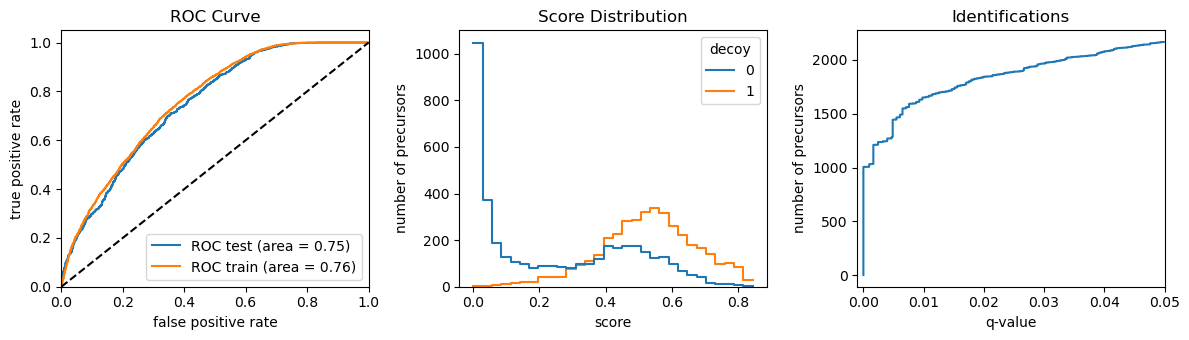

0:05:29.002071  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:05:29.002481  PROGRESS: Accumulated precursors: 7,946, 0.01 FDR: 1,651, 0.001 FDR: 1,032
0:05:29.003125  INFO: calibration group: precursor, fitting mz estimator 


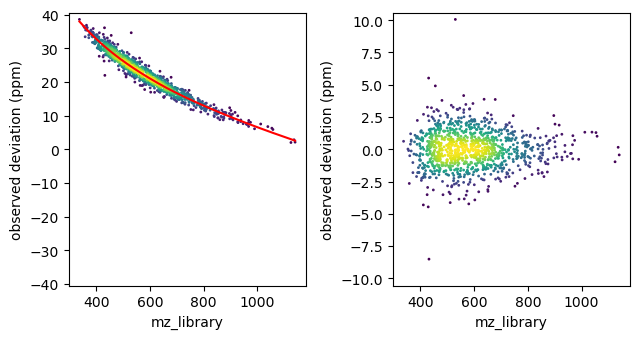

0:05:29.108598  INFO: calibration group: precursor, fitting rt estimator 


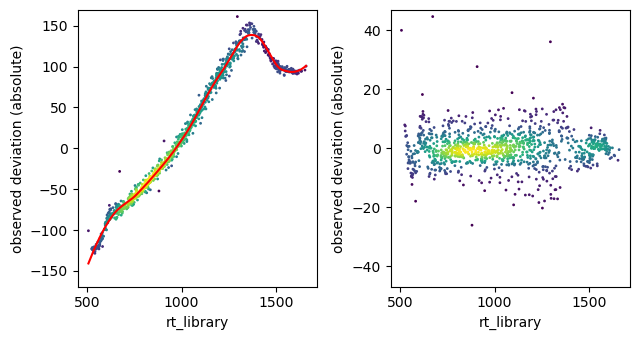

0:05:29.211300  INFO: calibration group: precursor, fitting mobility estimator 


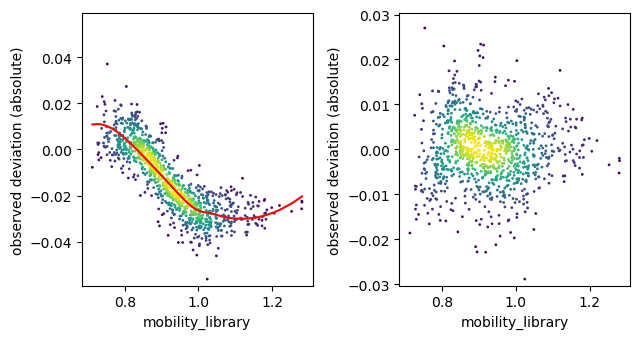

0:05:29.328969  INFO: calibration group: fragment, fitting mz estimator 


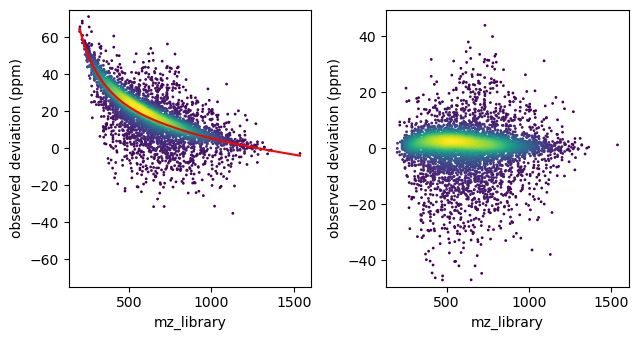

0:05:29.768072  INFO: calibration group: precursor, predicting mz
0:05:29.778620  INFO: calibration group: precursor, predicting rt
0:05:29.808319  INFO: calibration group: precursor, predicting mobility
0:05:29.832713  INFO: calibration group: fragment, predicting mz
0:05:29.966703  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:05:29.972108  PROGRESS: MS1 error: 15, MS2 error: 18.621657083967563, RT error: 30, Mobility error: 0.03
0:05:29.973290  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:05:29.973515  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:29.973707  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:05:29.973926  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7882/7882 [00:00<00:00, 12312.39it/s]
0:05:59.514483  INFO: Scored 7882 candidates
0:05:59.519856  INFO: 2.03% of targets failed, 4.43% of decoys failed
0:05:59.574710  INFO: number of dfs in feat

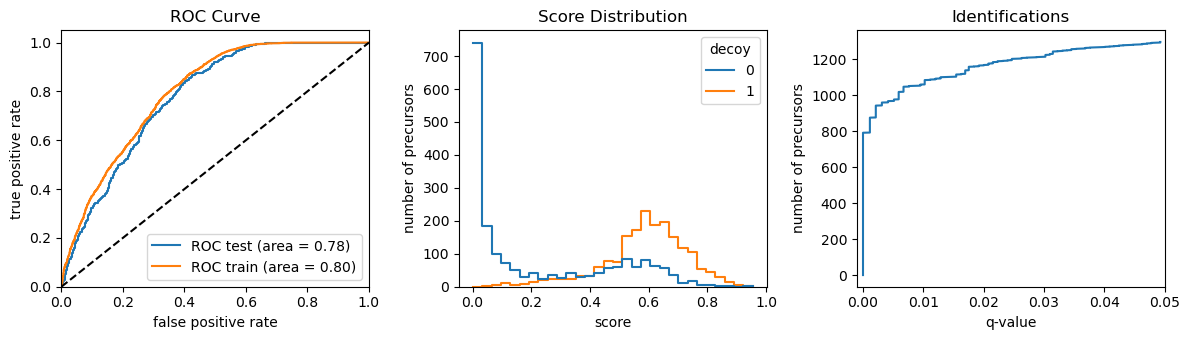

0:06:00.164105  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:06:00.164496  PROGRESS: Accumulated precursors: 3,863, 0.01 FDR: 1,061, 0.001 FDR: 793
0:06:00.165392  INFO: calibration group: precursor, fitting mz estimator 


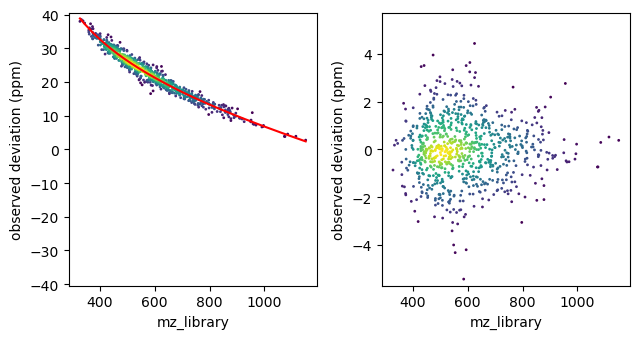

0:06:00.501671  INFO: calibration group: precursor, fitting rt estimator 


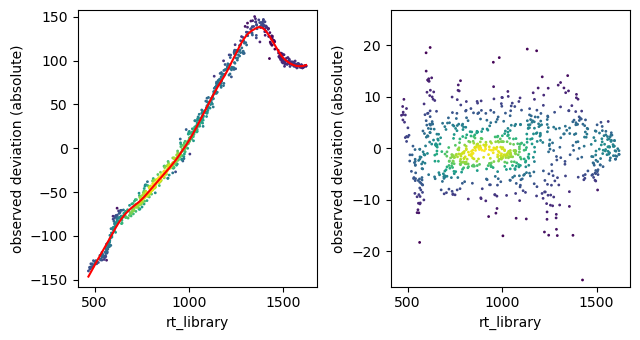

0:06:00.603048  INFO: calibration group: precursor, fitting mobility estimator 


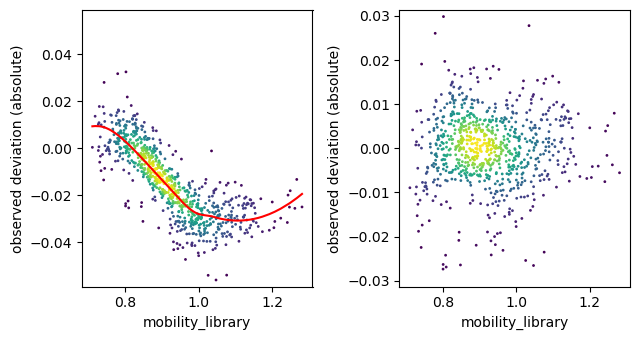

0:06:00.714045  INFO: calibration group: fragment, fitting mz estimator 


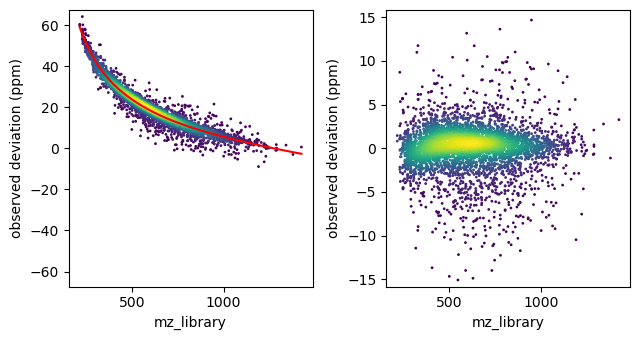

0:06:01.010660  INFO: calibration group: precursor, predicting mz
0:06:01.021965  INFO: calibration group: precursor, predicting rt
0:06:01.068742  INFO: calibration group: precursor, predicting mobility
0:06:01.087364  INFO: calibration group: fragment, predicting mz
0:06:01.188891  PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 4000 ===
0:06:01.191826  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:06:01.193040  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:06:01.193382  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:01.193784  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:06:01.194098  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7928/7928 [00:00<00:00, 12487.48it/s]
0:06:16.774935  INFO: Scored 7928 candidates
0:06:16.777755  INFO: 2.44% of targets failed, 5.32% of decoys failed
0:06:16.833749  INFO: number of dfs in features: 1, total n

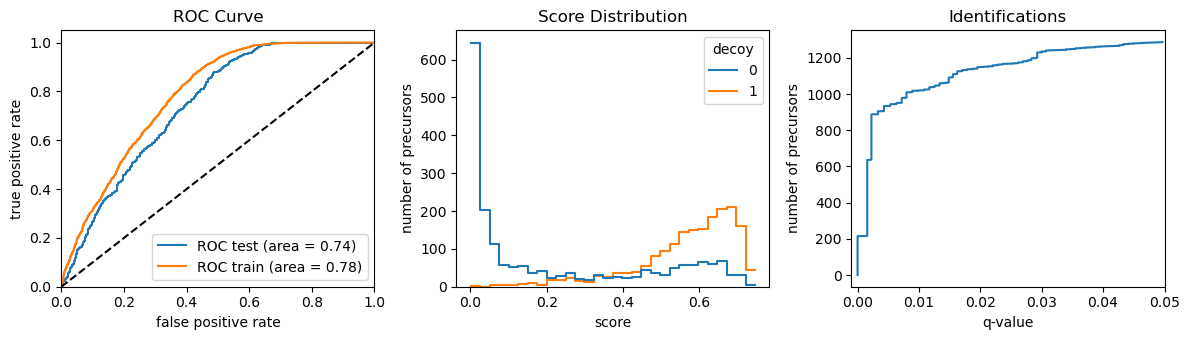

0:06:17.420675  PROGRESS: === checking if recalibration conditions were reached, target 800 precursors ===
0:06:17.421029  PROGRESS: Accumulated precursors: 3,879, 0.01 FDR: 1,021, 0.001 FDR: 216
0:06:17.421433  PROGRESS: === Epoch 3, step 1, extracting elution groups 4000 to 8000 ===
0:06:17.423790  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:06:17.425073  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:06:17.425459  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:17.425821  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:06:17.426072  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7921/7921 [00:00<00:00, 12030.70it/s]
0:06:32.271554  INFO: Scored 7921 candidates
0:06:32.277013  INFO: 2.81% of targets failed, 4.89% of decoys failed
0:06:32.337950  INFO: number of dfs in features: 2, total number of features: 15240


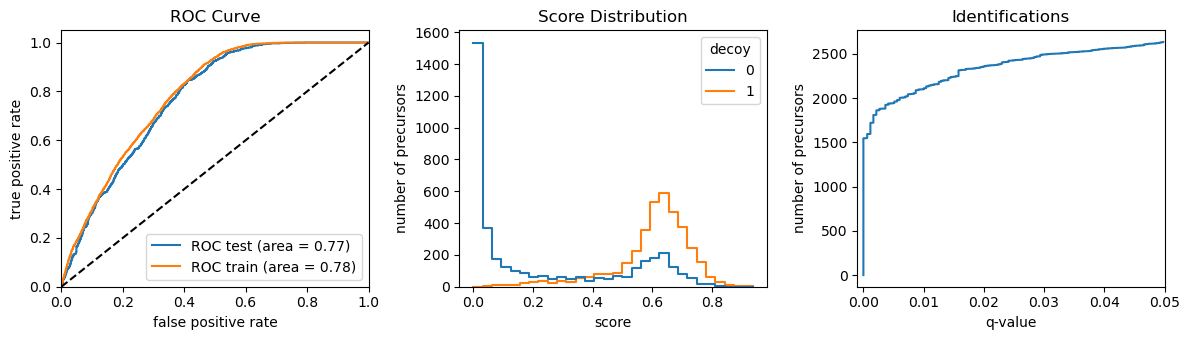

0:06:34.598999  PROGRESS: === checking if recalibration conditions were reached, target 800 precursors ===
0:06:34.599319  PROGRESS: Accumulated precursors: 7,756, 0.01 FDR: 2,100, 0.001 FDR: 1,594
0:06:34.602273  INFO: calibration group: precursor, fitting mz estimator 


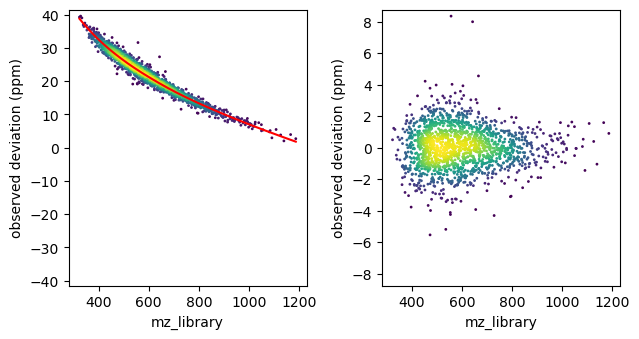

0:06:34.752951  INFO: calibration group: precursor, fitting rt estimator 


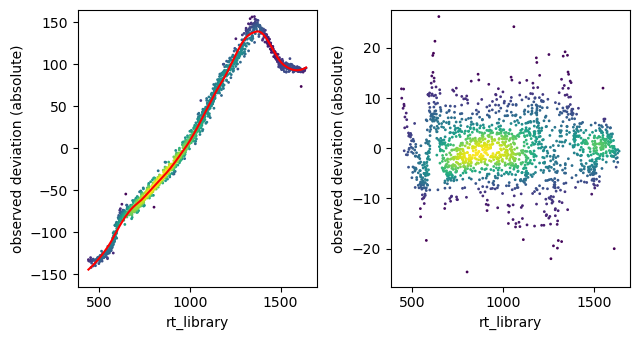

0:06:34.886573  INFO: calibration group: precursor, fitting mobility estimator 


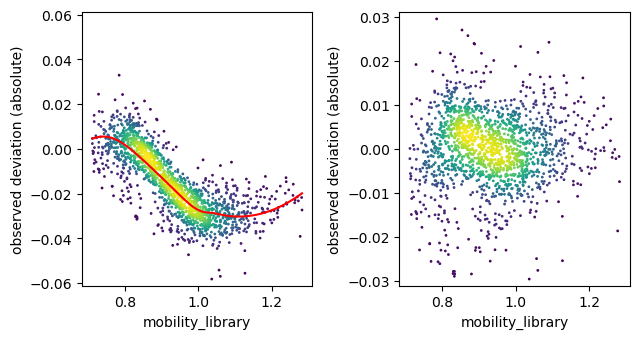

0:06:35.034112  INFO: calibration group: fragment, fitting mz estimator 


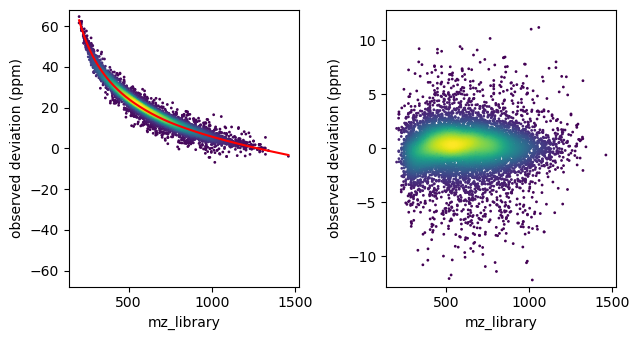

0:06:35.899166  INFO: calibration group: precursor, predicting mz
0:06:35.910019  INFO: calibration group: precursor, predicting rt
0:06:35.938460  INFO: calibration group: precursor, predicting mobility
0:06:35.950075  INFO: calibration group: fragment, predicting mz
0:06:36.066342  PROGRESS: === Epoch 4, step 0, extracting elution groups 0 to 4000 ===
0:06:36.074173  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:06:36.075776  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:06:36.076106  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:36.076449  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:06:36.076778  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7931/7931 [00:00<00:00, 12487.29it/s]
0:06:51.144869  INFO: Scored 7931 candidates
0:06:51.147226  INFO: 1.99% of targets failed, 5.38% of decoys failed
0:06:51.205013  INFO: number of dfs in features: 1, total n

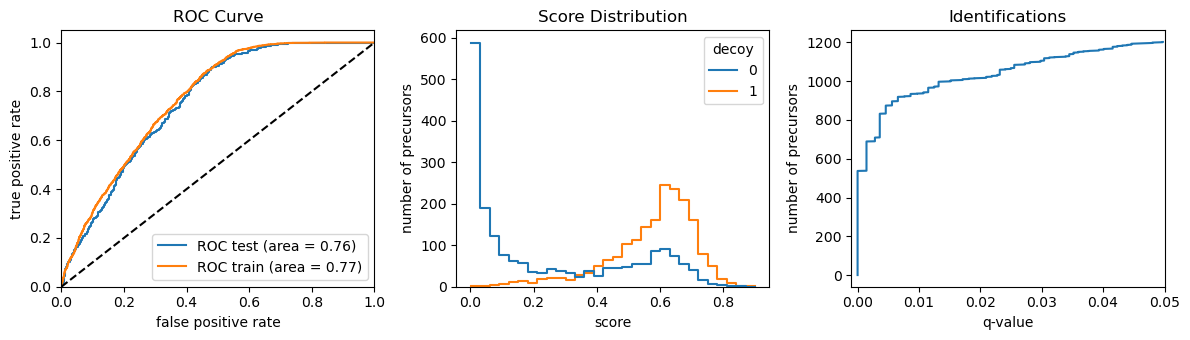

0:06:51.706005  PROGRESS: === checking if recalibration conditions were reached, target 1000 precursors ===
0:06:51.706401  PROGRESS: Accumulated precursors: 3,887, 0.01 FDR: 937, 0.001 FDR: 538
0:06:51.706575  PROGRESS: === Epoch 4, step 1, extracting elution groups 4000 to 8000 ===
0:06:51.708777  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:06:51.710030  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:06:51.710337  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:51.710560  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:06:51.710735  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7939/7939 [00:00<00:00, 12197.82it/s]
0:07:06.555054  INFO: Scored 7939 candidates
0:07:06.557832  INFO: 2.24% of targets failed, 5.42% of decoys failed
0:07:06.613622  INFO: number of dfs in features: 2, total number of features: 15281


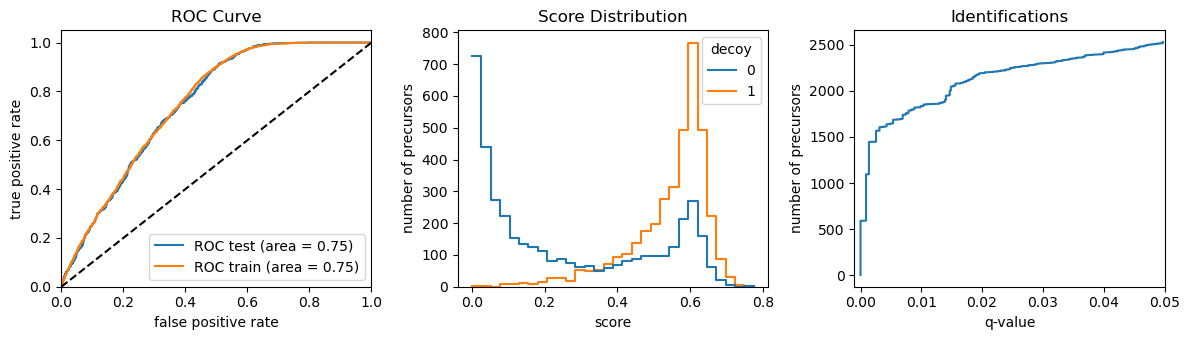

0:07:07.224595  PROGRESS: === checking if recalibration conditions were reached, target 1000 precursors ===
0:07:07.224883  PROGRESS: Accumulated precursors: 7,791, 0.01 FDR: 1,836, 0.001 FDR: 1,095
0:07:07.225466  INFO: calibration group: precursor, fitting mz estimator 


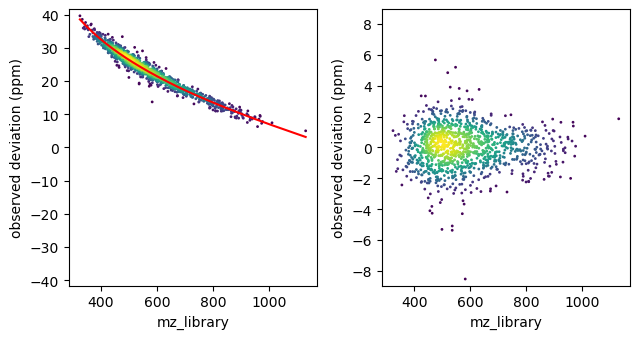

0:07:07.350559  INFO: calibration group: precursor, fitting rt estimator 


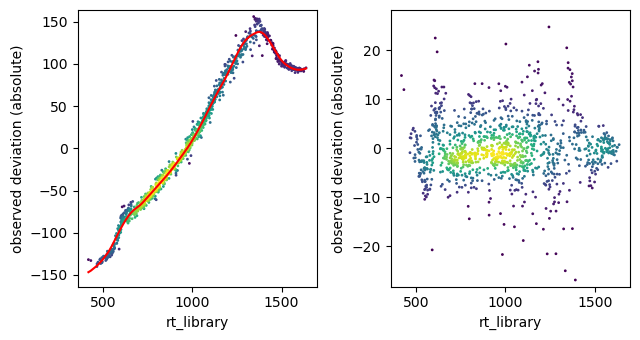

0:07:07.496616  INFO: calibration group: precursor, fitting mobility estimator 


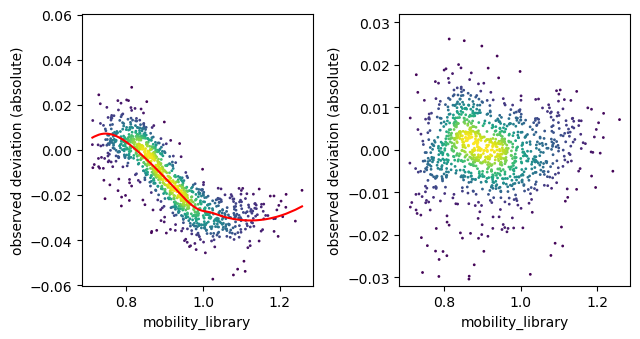

0:07:07.634318  INFO: calibration group: fragment, fitting mz estimator 


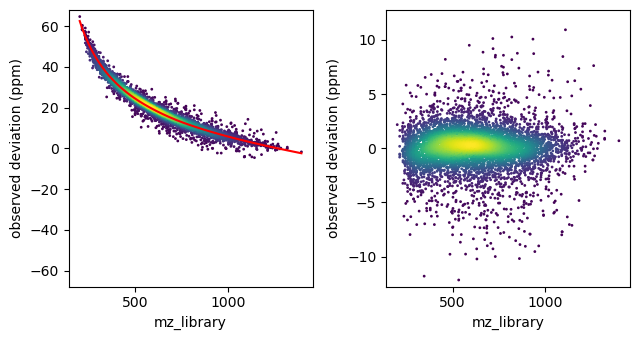

0:07:08.150974  INFO: calibration group: precursor, predicting mz
0:07:08.159983  INFO: calibration group: precursor, predicting rt
0:07:08.189198  INFO: calibration group: precursor, predicting mobility
0:07:08.201822  INFO: calibration group: fragment, predicting mz
0:07:08.317731  INFO: calibration group: precursor, predicting mz
0:07:08.331230  INFO: calibration group: precursor, predicting rt
0:07:08.358628  INFO: calibration group: precursor, predicting mobility
0:07:08.374696  INFO: calibration group: fragment, predicting mz
0:07:08.491717  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:07:08.504737  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:07:08.505310  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:07:08.505704  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.08
0:07:08.506057  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 178612/178612 [00:14<00:00, 12

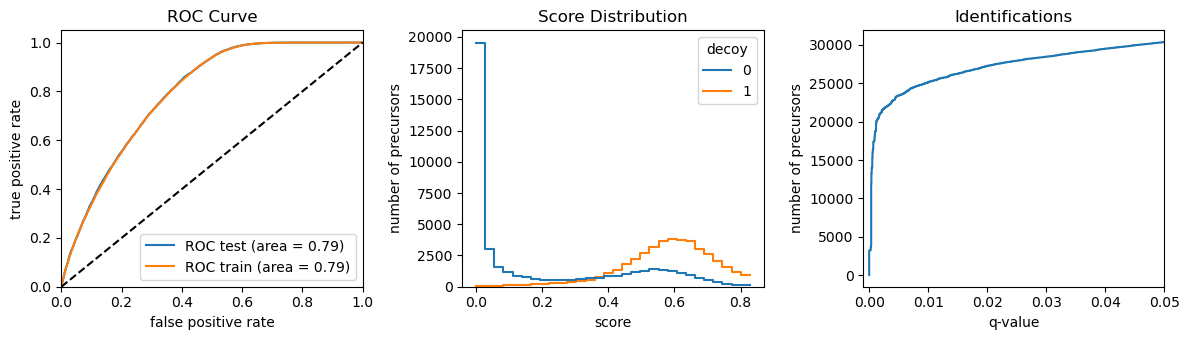

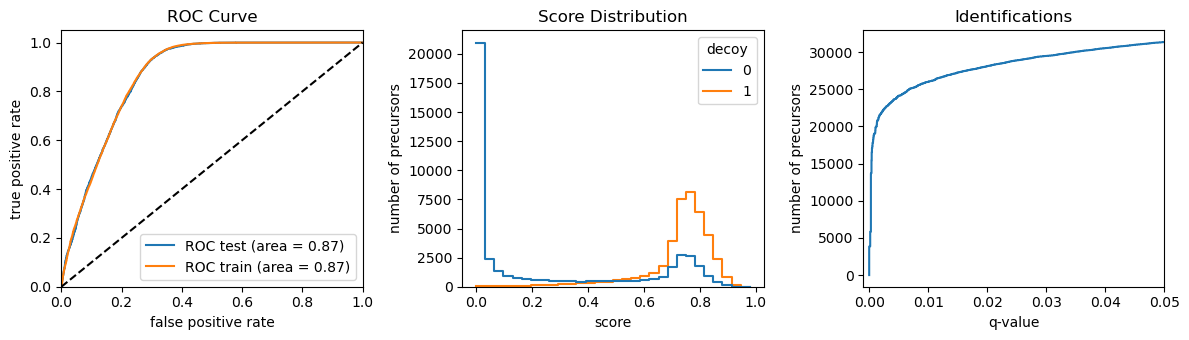

0:12:43.358186  PROGRESS: === extraction finished, 0.05 FDR: 29,866, 0.01 FDR: 25,744, 0.001 FDR: 19,084 ===
0:12:43.366090  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_01_S4-E2_1_636.d
0:12:43.368273  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_01_S4-E2_1_636.d
0:12:43.368672  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_01_S4-E2_1_636.d
0:12:43.911140  INFO: Reading 16,256 frames with 2,455,746,540 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25wo_01_S4-E2_1_636.d
100%|██████████| 16256/16256 [00:13

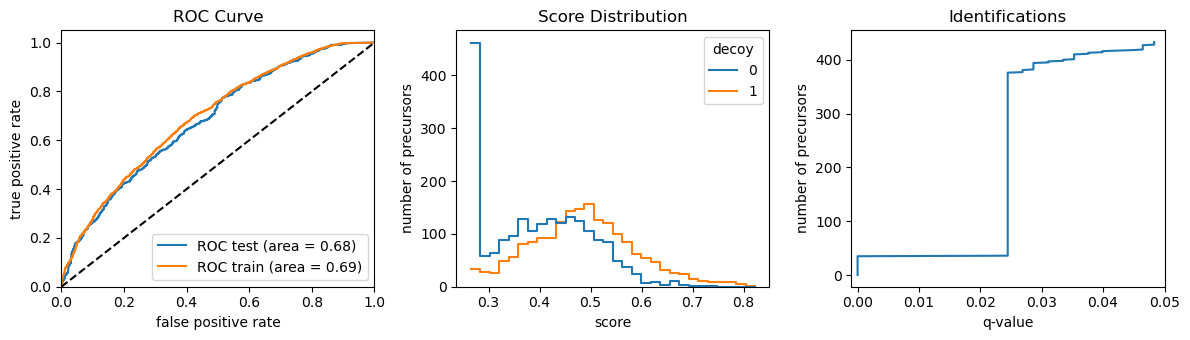

0:15:04.792039  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:15:04.792527  PROGRESS: Accumulated precursors: 3,895, 0.01 FDR: 36, 0.001 FDR: 36
0:15:04.792703  PROGRESS: === Epoch 0, step 1, extracting elution groups 4000 to 8000 ===
0:15:04.795524  PROGRESS: MS1 error: 120, MS2 error: 120, RT error: 360, Mobility error: 0.06
0:15:04.796818  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:15:04.797135  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:15:04.797358  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:15:04.797678  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7763/7763 [00:00<00:00, 12472.25it/s]
0:17:02.865951  INFO: Scored 7763 candidates
0:17:02.869571  INFO: 0.00% of targets failed, 0.14% of decoys failed
0:17:02.935400  INFO: number of dfs in features: 2, total number of features: 15549


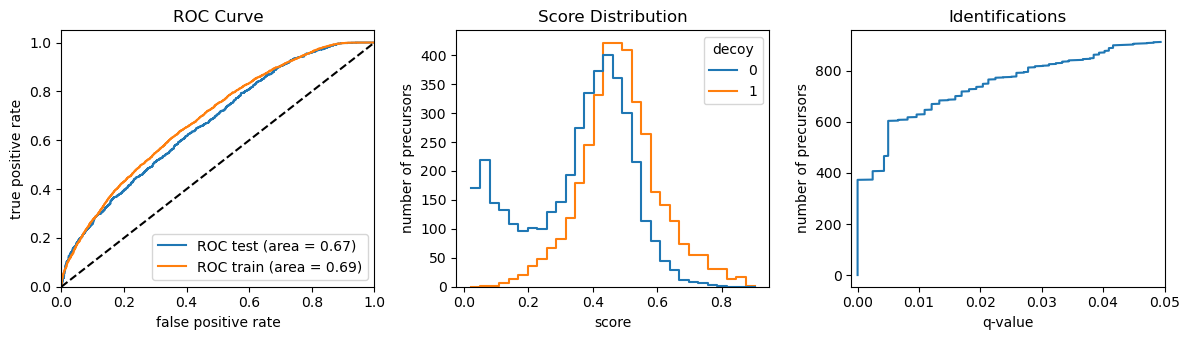

0:17:03.808043  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:17:03.808404  PROGRESS: Accumulated precursors: 7,775, 0.01 FDR: 630, 0.001 FDR: 374
0:17:03.809040  INFO: calibration group: precursor, fitting mz estimator 


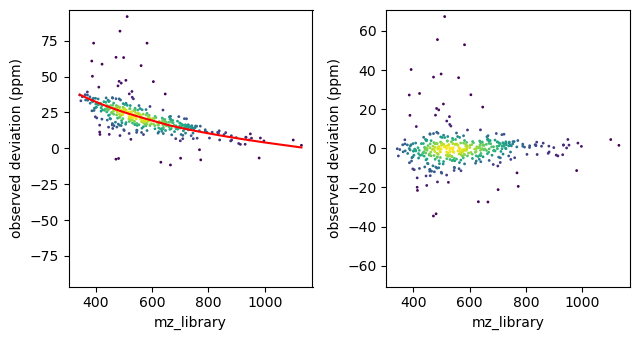

0:17:03.913640  INFO: calibration group: precursor, fitting rt estimator 


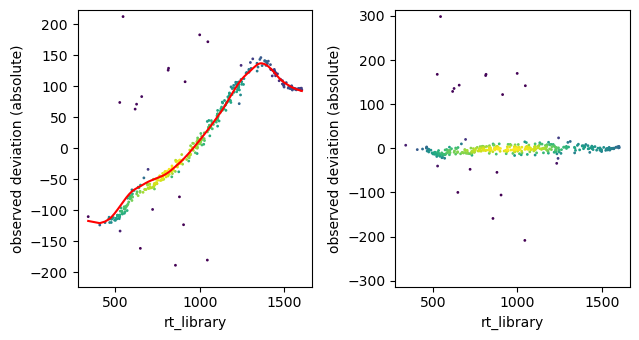

0:17:04.003538  INFO: calibration group: precursor, fitting mobility estimator 


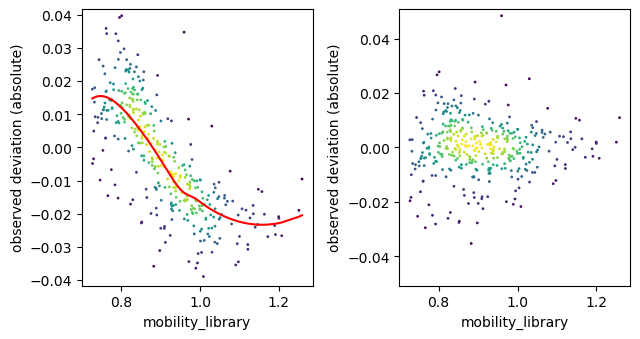

0:17:04.115469  INFO: calibration group: fragment, fitting mz estimator 


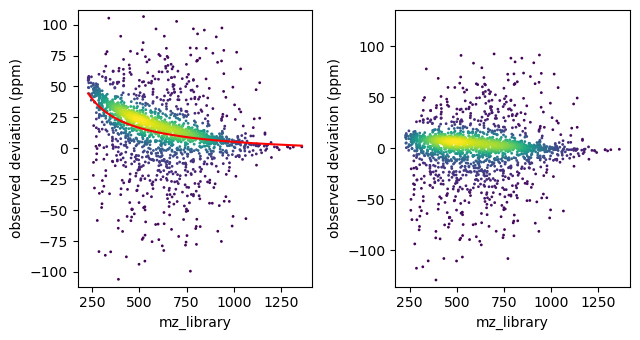

0:17:04.276472  INFO: calibration group: precursor, predicting mz
0:17:04.305222  INFO: calibration group: precursor, predicting rt
0:17:04.346277  INFO: calibration group: precursor, predicting mobility
0:17:04.357551  INFO: calibration group: fragment, predicting mz
0:17:04.461246  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:17:04.466975  PROGRESS: MS1 error: 21.540927086772776, MS2 error: 56.0183278583767, RT error: 56.05440266418753, Mobility error: 0.03
0:17:04.468089  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:17:04.468319  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:04.468603  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:17:04.468915  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7344/7344 [00:00<00:00, 12547.51it/s]
0:17:22.787215  INFO: Scored 7344 candidates
0:17:22.791695  INFO: 0.16% of targets failed, 0.75% of decoys failed
0:17:22.849290

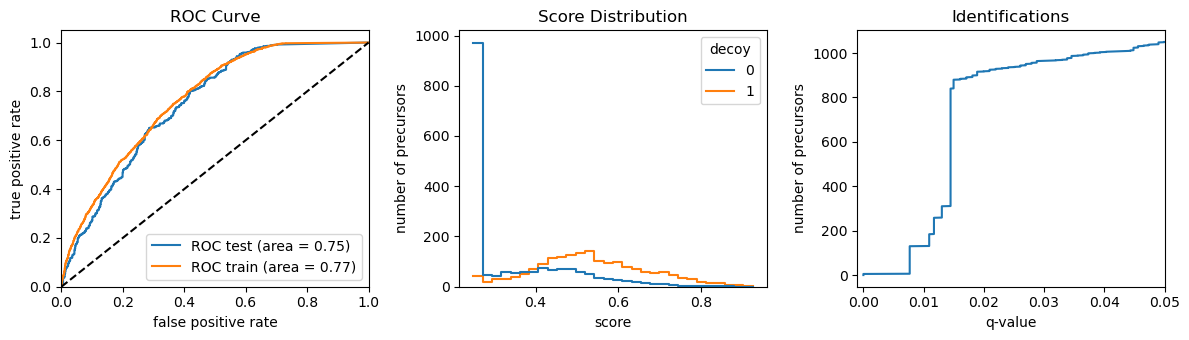

0:17:23.589523  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:17:23.589848  PROGRESS: Accumulated precursors: 3,665, 0.01 FDR: 131, 0.001 FDR: 6
0:17:23.590161  PROGRESS: === Epoch 1, step 1, extracting elution groups 4000 to 8000 ===
0:17:23.592382  PROGRESS: MS1 error: 21.540927086772776, MS2 error: 56.0183278583767, RT error: 56.05440266418753, Mobility error: 0.03
0:17:23.593671  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:17:23.594068  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:23.594281  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:17:23.594449  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7401/7401 [00:00<00:00, 12578.32it/s]
0:17:41.274629  INFO: Scored 7401 candidates
0:17:41.279475  INFO: 0.39% of targets failed, 0.73% of decoys failed
0:17:41.333584  INFO: number of dfs in features: 2, total number of features: 14671


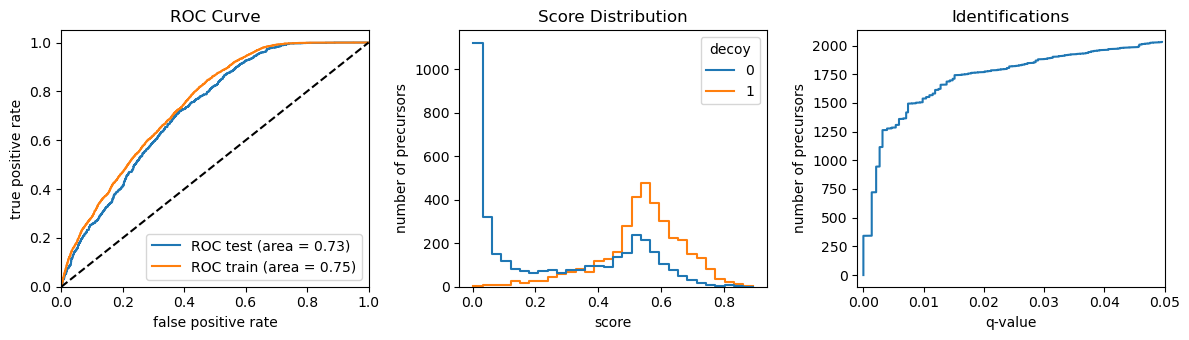

0:17:42.320272  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:17:42.320614  PROGRESS: Accumulated precursors: 7,360, 0.01 FDR: 1,539, 0.001 FDR: 343
0:17:42.320785  PROGRESS: === Epoch 1, step 2, extracting elution groups 8000 to 12000 ===
0:17:42.322972  PROGRESS: MS1 error: 21.540927086772776, MS2 error: 56.0183278583767, RT error: 56.05440266418753, Mobility error: 0.03
0:17:42.324298  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:17:42.324628  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:42.324852  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:17:42.325065  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7412/7412 [00:00<00:00, 12508.50it/s]
0:17:59.950774  INFO: Scored 7412 candidates
0:17:59.953585  INFO: 0.54% of targets failed, 0.97% of decoys failed
0:18:00.007774  INFO: number of dfs in features: 3, total number of features: 22028

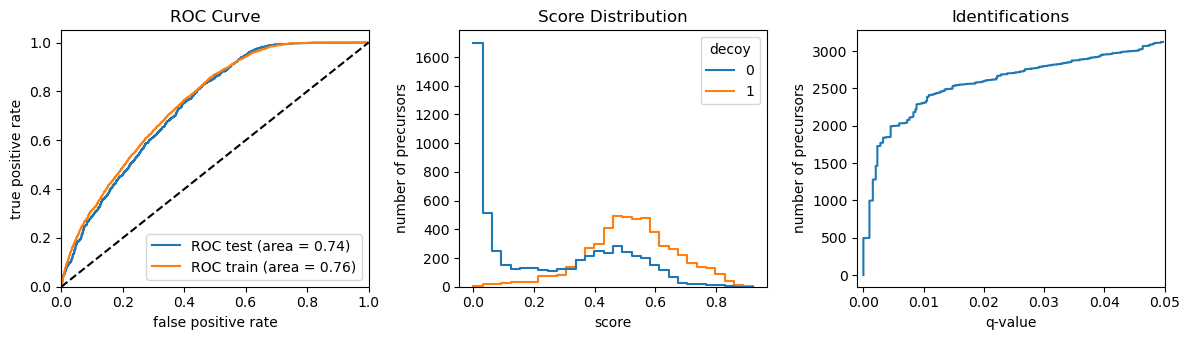

0:18:01.300148  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:18:01.300446  PROGRESS: Accumulated precursors: 11,057, 0.01 FDR: 2,303, 0.001 FDR: 496
0:18:01.301096  INFO: calibration group: precursor, fitting mz estimator 


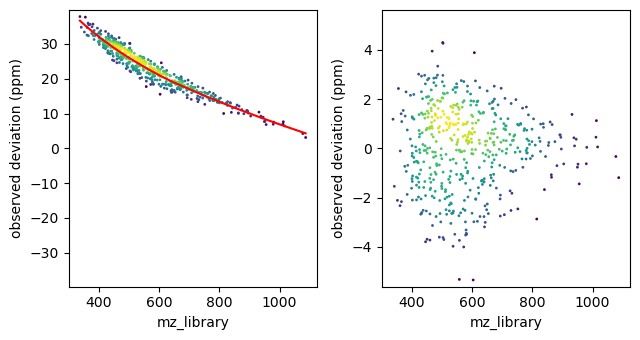

0:18:01.422569  INFO: calibration group: precursor, fitting rt estimator 


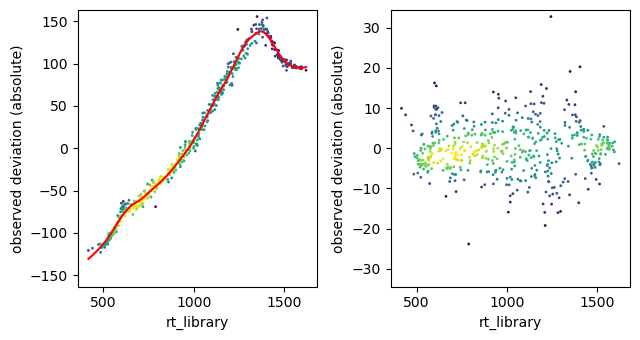

0:18:01.519451  INFO: calibration group: precursor, fitting mobility estimator 


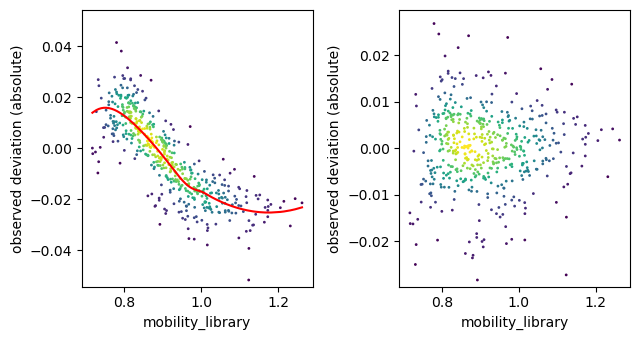

0:18:01.625367  INFO: calibration group: fragment, fitting mz estimator 


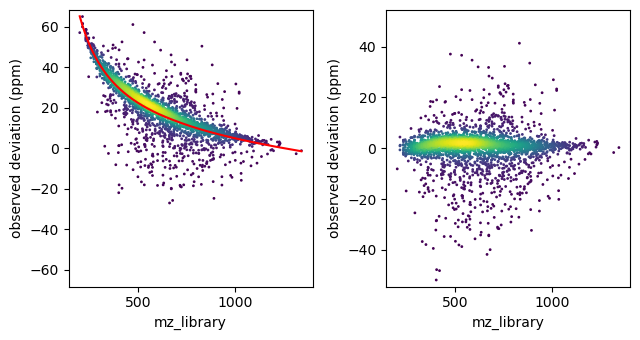

0:18:01.810034  INFO: calibration group: precursor, predicting mz
0:18:01.819215  INFO: calibration group: precursor, predicting rt
0:18:01.845724  INFO: calibration group: precursor, predicting mobility
0:18:01.859560  INFO: calibration group: fragment, predicting mz
0:18:01.969009  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:18:01.972697  PROGRESS: MS1 error: 15, MS2 error: 17.435259491541004, RT error: 30, Mobility error: 0.03
0:18:01.973865  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:18:01.974163  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:18:01.974447  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:18:01.974736  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7442/7442 [00:00<00:00, 12547.51it/s]
0:18:16.208158  INFO: Scored 7442 candidates
0:18:16.211488  INFO: 1.17% of targets failed, 3.64% of decoys failed
0:18:16.262799  INFO: number of dfs in feat

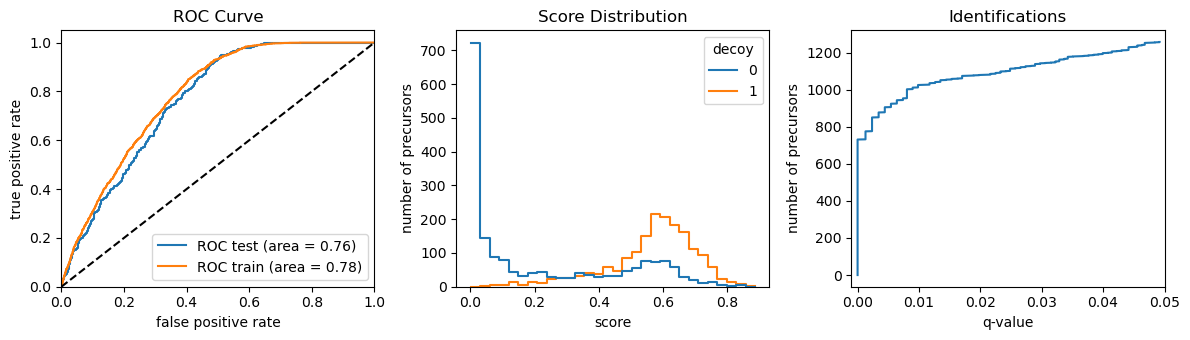

0:18:17.157251  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:18:17.157696  PROGRESS: Accumulated precursors: 3,679, 0.01 FDR: 1,026, 0.001 FDR: 732
0:18:17.158658  INFO: calibration group: precursor, fitting mz estimator 


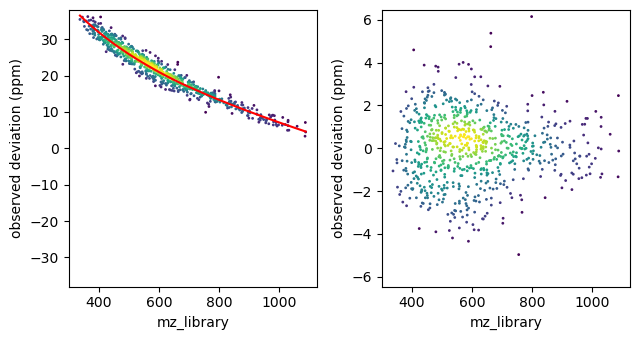

0:18:17.270663  INFO: calibration group: precursor, fitting rt estimator 


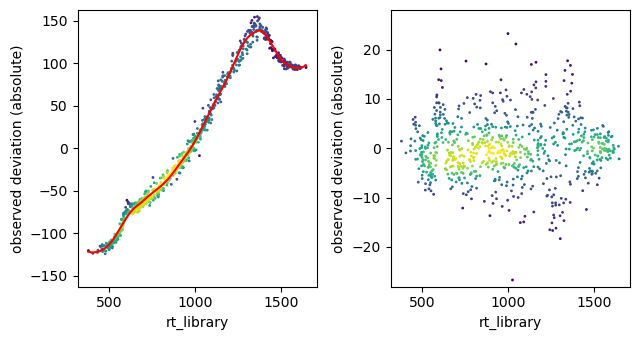

0:18:17.388506  INFO: calibration group: precursor, fitting mobility estimator 


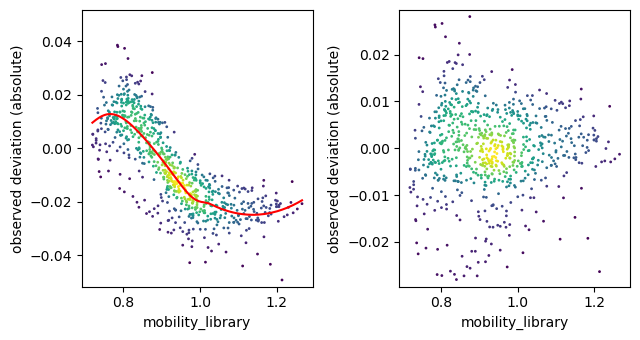

0:18:17.490458  INFO: calibration group: fragment, fitting mz estimator 


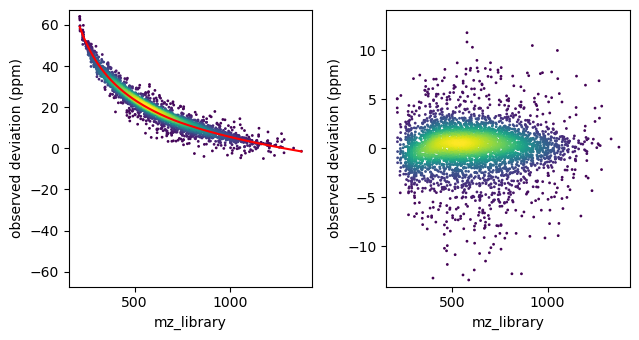

0:18:17.757650  INFO: calibration group: precursor, predicting mz
0:18:17.768655  INFO: calibration group: precursor, predicting rt
0:18:17.800430  INFO: calibration group: precursor, predicting mobility
0:18:17.812350  INFO: calibration group: fragment, predicting mz
0:18:17.937578  PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 4000 ===
0:18:17.942143  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:18:17.943504  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:18:17.943759  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:18:17.943934  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:18:17.944137  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7385/7385 [00:00<00:00, 12586.73it/s]
0:18:33.585133  INFO: Scored 7385 candidates
0:18:33.590813  INFO: 1.40% of targets failed, 4.23% of decoys failed
0:18:33.641308  INFO: number of dfs in features: 1, total n

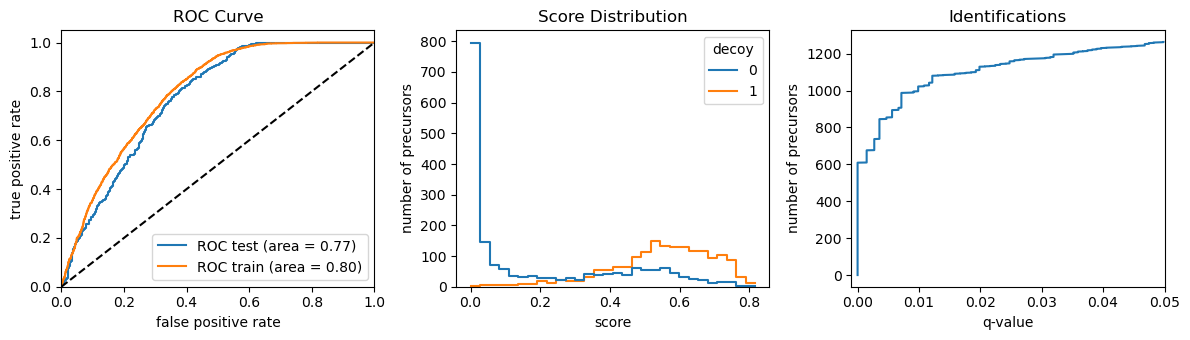

0:18:34.456617  PROGRESS: === checking if recalibration conditions were reached, target 800 precursors ===
0:18:34.456947  PROGRESS: Accumulated precursors: 3,642, 0.01 FDR: 1,023, 0.001 FDR: 610
0:18:34.457186  PROGRESS: === Epoch 3, step 1, extracting elution groups 4000 to 8000 ===
0:18:34.459396  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:18:34.460789  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:18:34.461122  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:18:34.461342  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:18:34.461643  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7465/7465 [00:00<00:00, 12593.20it/s]
0:18:49.935480  INFO: Scored 7465 candidates
0:18:49.937775  INFO: 1.43% of targets failed, 5.18% of decoys failed
0:18:49.989318  INFO: number of dfs in features: 2, total number of features: 14404


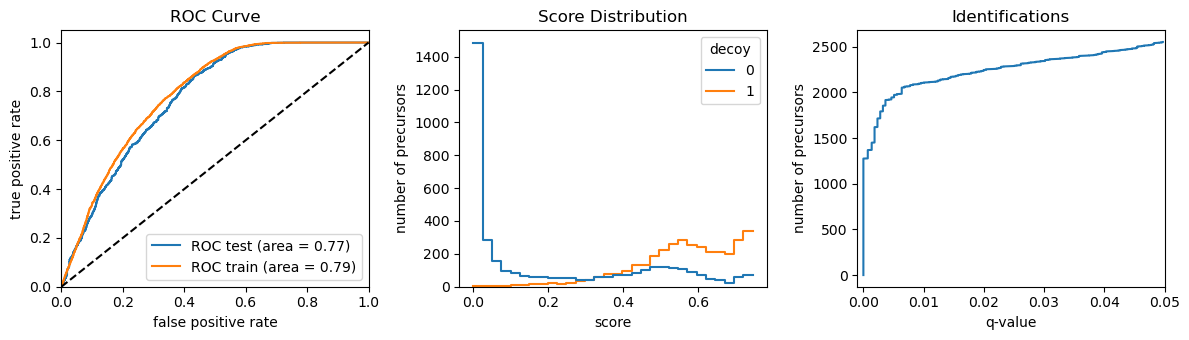

0:18:51.465691  PROGRESS: === checking if recalibration conditions were reached, target 800 precursors ===
0:18:51.466098  PROGRESS: Accumulated precursors: 7,312, 0.01 FDR: 2,105, 0.001 FDR: 1,370
0:18:51.466907  INFO: calibration group: precursor, fitting mz estimator 


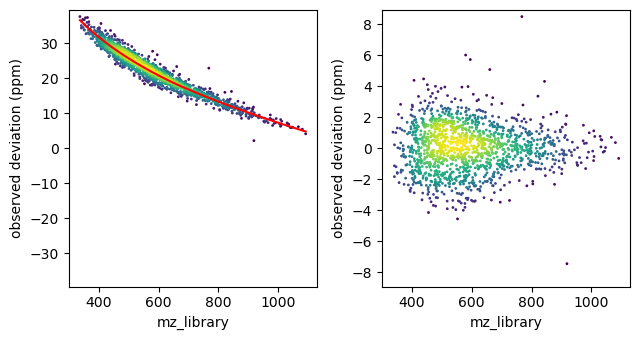

0:18:51.600552  INFO: calibration group: precursor, fitting rt estimator 


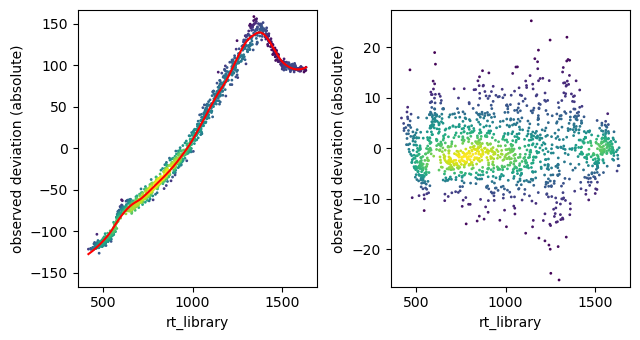

0:18:51.736582  INFO: calibration group: precursor, fitting mobility estimator 


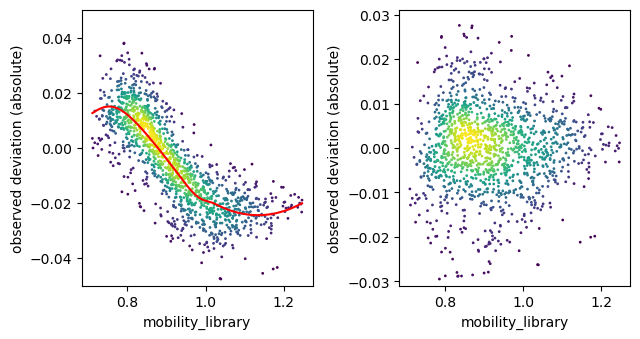

0:18:52.173215  INFO: calibration group: fragment, fitting mz estimator 


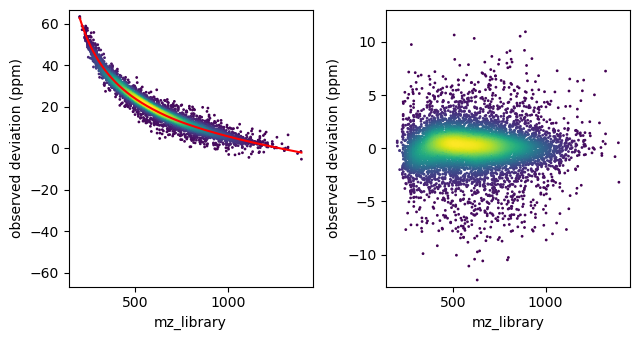

0:18:52.855306  INFO: calibration group: precursor, predicting mz
0:18:52.881917  INFO: calibration group: precursor, predicting rt
0:18:52.919566  INFO: calibration group: precursor, predicting mobility
0:18:52.931977  INFO: calibration group: fragment, predicting mz
0:18:53.091415  PROGRESS: === Epoch 4, step 0, extracting elution groups 0 to 4000 ===
0:18:53.096046  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:18:53.097247  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:18:53.097493  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:18:53.097698  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:18:53.097876  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7368/7368 [00:00<00:00, 12470.42it/s]
0:19:08.590510  INFO: Scored 7368 candidates
0:19:08.592926  INFO: 1.42% of targets failed, 4.13% of decoys failed
0:19:08.647547  INFO: number of dfs in features: 1, total n

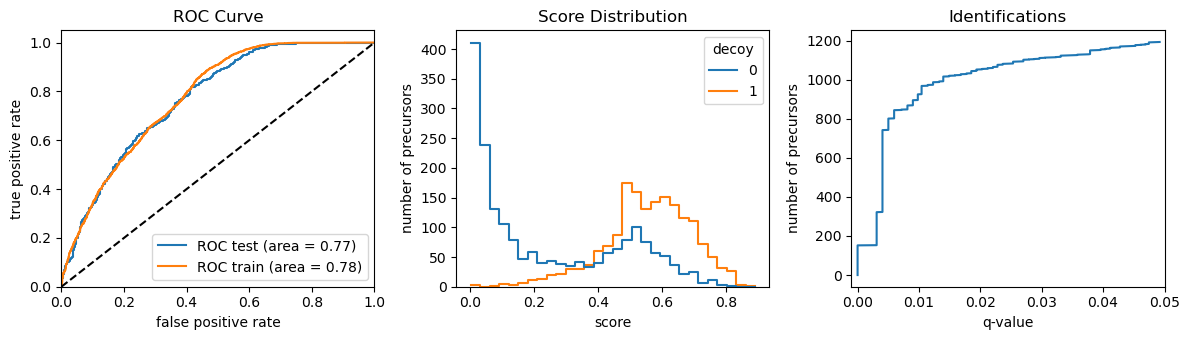

0:19:09.224442  PROGRESS: === checking if recalibration conditions were reached, target 1000 precursors ===
0:19:09.224828  PROGRESS: Accumulated precursors: 3,630, 0.01 FDR: 926, 0.001 FDR: 153
0:19:09.225105  PROGRESS: === Epoch 4, step 1, extracting elution groups 4000 to 8000 ===
0:19:09.227324  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:19:09.228607  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:19:09.228901  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:19:09.229196  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:19:09.229371  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 7405/7405 [00:00<00:00, 12652.95it/s]
0:19:24.963299  INFO: Scored 7405 candidates
0:19:24.965961  INFO: 1.78% of targets failed, 4.20% of decoys failed
0:19:25.013429  INFO: number of dfs in features: 2, total number of features: 14354


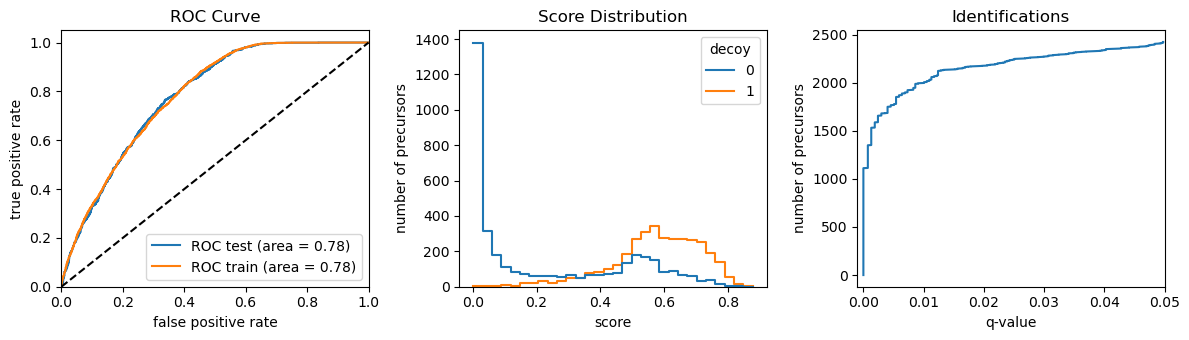

0:19:25.864557  PROGRESS: === checking if recalibration conditions were reached, target 1000 precursors ===
0:19:25.864844  PROGRESS: Accumulated precursors: 7,283, 0.01 FDR: 1,997, 0.001 FDR: 1,351
0:19:25.865534  INFO: calibration group: precursor, fitting mz estimator 


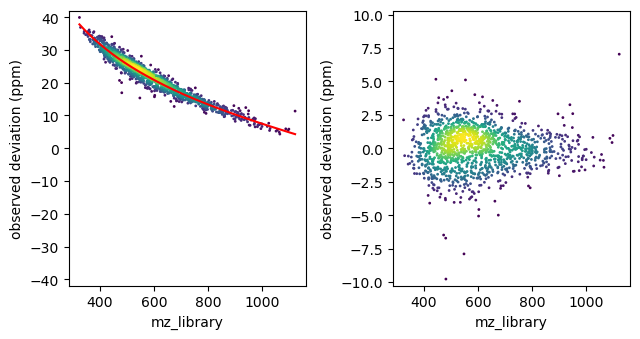

0:19:26.015975  INFO: calibration group: precursor, fitting rt estimator 


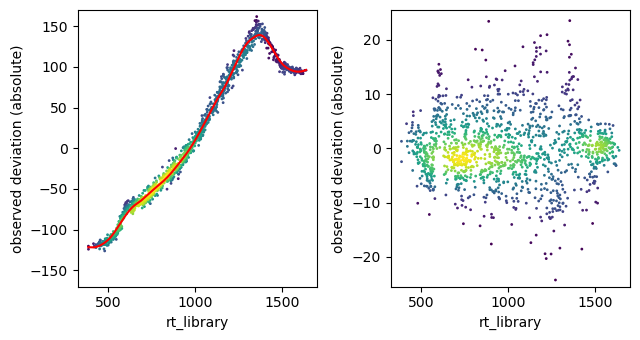

0:19:26.139658  INFO: calibration group: precursor, fitting mobility estimator 


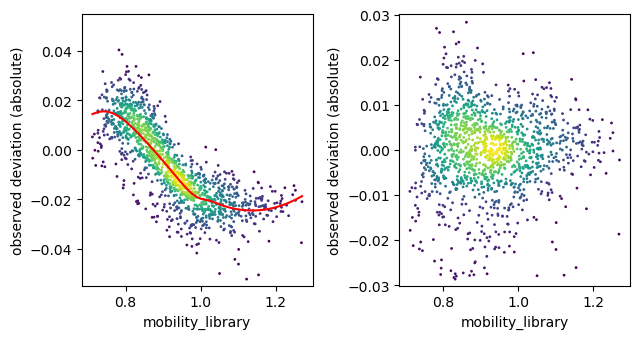

0:19:26.288032  INFO: calibration group: fragment, fitting mz estimator 


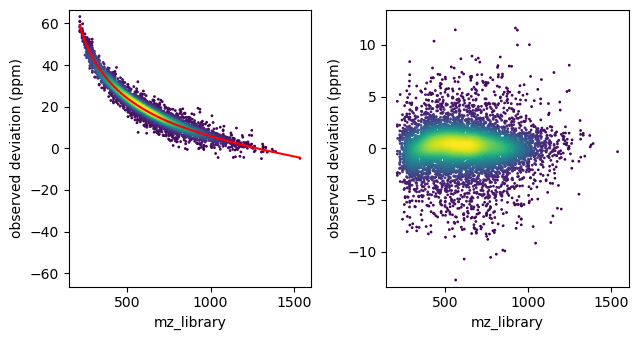

0:19:26.939283  INFO: calibration group: precursor, predicting mz
0:19:26.957045  INFO: calibration group: precursor, predicting rt
0:19:27.026856  INFO: calibration group: precursor, predicting mobility
0:19:27.043074  INFO: calibration group: fragment, predicting mz
0:19:27.158562  INFO: calibration group: precursor, predicting mz
0:19:27.169147  INFO: calibration group: precursor, predicting rt
0:19:27.192349  INFO: calibration group: precursor, predicting mobility
0:19:27.206174  INFO: calibration group: fragment, predicting mz
0:19:27.309252  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.03
0:19:27.321803  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:19:27.322264  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:19:27.322536  INFO: Expected peak length in RT is 8.00 seconds, sigma is 2.91
0:19:27.322922  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73
100%|██████████| 167261/167261 [00:13<00:00, 12

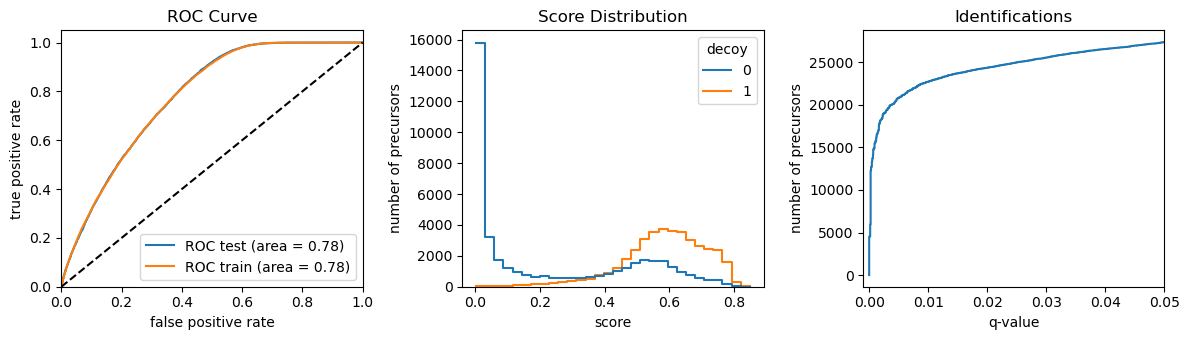

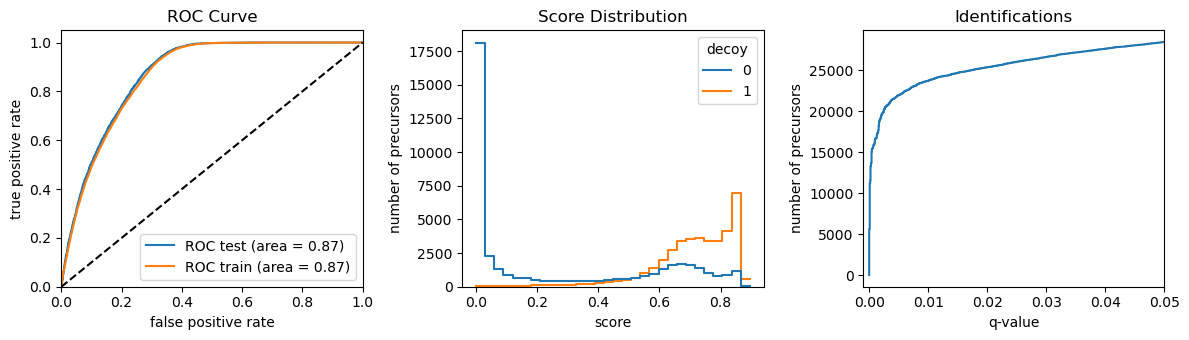

0:25:22.354038  PROGRESS: === extraction finished, 0.05 FDR: 27,086, 0.01 FDR: 23,478, 0.001 FDR: 16,543 ===


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

plan = Plan(raw_files)
plan.from_spec_lib_base(test_lib)
plan.run(output_location, keep_decoys=True, fdr=1.0)

In [ ]:
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    
    raw_name = precursors_flat.iloc[0]['raw_name']

    workflow = Workflow(
        plan.config, 
        dia_data, 
        precursors_flat, 
        fragments_flat,
        )
    
    workflow.calibration()
    df = workflow.extraction(keep_decoys=True)

In [ ]:
df = workflow.extraction(keep_decoys=True)

In [ ]:
df[(df['decoy'] == 0)&(df['qval'] <= 0.01)]['proteins'].nunique()

In [ ]:
df_scored = fdr_correction(df)

In [ ]:
df_scored[(df_scored['decoy'] == 0)&(df_scored['qval'] <= 0.01)]['precursor_idx'].nunique()

In [ ]:
from alphadia.extraction import candidateselection

selection = candidateselection.MS1CentricCandidateSelection(
    dia_data,
    precursors_flat,
    rt_tolerance=60,
    mz_tolerance=15,
    mobility_tolerance=0.02,
    candidate_count=10,
    thread_count=20,
    precursor_mz_column='mz_calibrated',
    rt_column='rt_calibrated',
    mobility_column='mobility_calibrated',
    debug=False
)

candidates = selection()

In [ ]:
candidates.head()

In [ ]:
from alphadia.extraction import quadrupole, scoring, features
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

In [ ]:

extraction = scoring.MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    precursor_mz_column = 'mz_calibrated',
    fragment_mz_column = 'mz_calibrated',
    rt_column = 'rt_calibrated',
    mobility_column = 'mobility_calibrated',
    debug=False,
)

feature_df, fragment_df = extraction()




In [ ]:
del extraction

In [ ]:
feature_df['precursor_idx'].nunique()   

In [ ]:
feature_df['decoy'].value_counts()

In [ ]:
sns.scatterplot(data=feature_df, x='rt_calibrated', y='mz_calibrated', hue='decoy')

In [ ]:
feature_df[feature_df['decoy'] == 0]['precursor_idx'].nunique()

In [ ]:
df_top = feature_df[feature_df['fragment_coverage'] > 0.4]
idx = df_top.groupby(['precursor_idx'])['mean_fragment_intensity'].idxmax()
df_top = df_top.loc[idx]
df_top[df_top['decoy'] == 0]['precursor_idx'].nunique()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

feature_columns = ['precursor_mass_error', 
            'precursor_isotope_correlation', 
            'fraction_fragments', 
            'intensity_correlation',
            'sum_precursor_intensity',
            'sum_fragment_intensity',
            'mean_fragment_intensity',
            'mean_fragment_nonzero',
            'rt_error',
            'mobility_error',
            'mean_observation_score',
            'var_observation_score',
            'fragment_frame_correlation', 'fragment_scan_correlation', 'template_frame_correlation', 'template_scan_correlation'
            ]

df_top = df_top.dropna().reset_index(drop=True).copy()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('GBC', MLPClassifier(hidden_layer_sizes=(50, 25, 5), max_iter=400, alpha=1, learning_rate='adaptive', learning_rate_init=0.001, early_stopping=True, tol=1e-6))
])

X = df_top[feature_columns].values
y = df_top['decoy'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
pipeline.fit(X_train, y_train)


y_test_proba = pipeline.predict_proba(X_test)[:,1]
y_test_pred = np.round(y_test_proba)

y_train_proba = pipeline.predict_proba(X_train)[:,1]
y_train_pred = np.round(y_train_proba)

df_top['proba'] = pipeline.predict_proba(X)[:,1]

df_top = df_top.sort_values(['proba'], ascending=True)
target_values = 1-df_top['decoy'].values
decoy_cumsum = np.cumsum(df_top['decoy'].values)
target_cumsum = np.cumsum(target_values)
fdr_values = decoy_cumsum/target_cumsum

df_top['qval'] = scoring.fdr_to_q_values(fdr_values)

In [ ]:
df_top[(df_top['decoy'] == 0)&(df_top['qval'] < 0.01)]['precursor_idx'].nunique()

In [ ]:
X = feature_df[feature_columns].values
feature_df['proba'] = pipeline.predict_proba(X)[:,1]

In [ ]:
idx = feature_df.groupby(['precursor_idx'])['proba'].idxmin()
rescored = feature_df.loc[idx]

In [ ]:
df_scored = fdr_correction(rescored)

In [ ]:
df_scored[(df_scored['decoy'] == 0)&(df_scored['qval'] <= 0.01)]['precursor_idx'].nunique()

In [ ]:
df_scored[(df_scored['decoy'] == 0)&(df_scored['qval'] > 0.01)&(df_scored['fragment_coverage'] > 0.5)]['precursor_idx'].nunique()

In [ ]:
df_scored['category'] = df_scored['decoy'].map({0: 'target', 1: 'decoy'})

# leave category as target if qval <0.01 change it to target_missed if qval > 0.01
df_scored['category'] = df_scored.apply(lambda x: 'target_missed' if x['category'] == 'target' and x['proba'] > 0.4 else x['category'], axis=1)

In [ ]:
sns.histplot(df_scored, x='rt_error', hue='category', element='step', bins=100)

In [ ]:
sns.scatterplot(df_scored[df_scored['category'] == 'target'], x='rt_library', y='rt_error', s=1, hue='category', hue_order=[ 'target_missed', 'target'])

In [ ]:
feature_df['correlation_score'] = feature_df[['fragment_frame_correlation', 'fragment_scan_correlation', 'template_frame_correlation', 'template_scan_correlation']].apply(np.mean, axis=1)

In [ ]:
df_re = scoring.fdr_correction(feature_df)

In [ ]:
df = df_re[df_re['decoy'] == 0]

df['fragment_coverage'] = np.round(10*df['fragment_coverage'])/10
df['sig'] = df['qval'] < 0.01

In [ ]:
df_re = df_re[df_re['base_width_mobility'] <0.2]

In [ ]:
sns.histplot(df_re, x='base_width_mobility', hue='decoy', stat='count',  bins=100, element='step', )

In [ ]:
sns.scatterplot(data=df, x='fragment_frame_correlation', y='fragment_scan_correlation', hue='decoy', alpha=0.01)

In [ ]:
0.03/1200 * 1e6

In [ ]:
from alphadia.extraction import plotting, quadrupole
@nb.njit
def build_feature(
    dense_fragments,
    template,
    fragments

):

    total_fragment_intensity = np.sum(np.sum(dense_fragments[0], axis=-1), axis=-1)
    total_template_intensity = np.sum(np.sum(template, axis=-1), axis=-1)

    fragment_mask_2d = (total_fragment_intensity > 0).astype(np.int8)
    fragment_mask_1d = np.sum(fragment_mask_2d, axis=-1) > 0
    fragment_mask_2d = fragment_mask_2d * np.expand_dims(fragments.intensity, axis=-1)

    # (n_fragments, n_observations, n_frames)
    fragments_frame_profile = features.or_envelope_2d(features.frame_profile_2d(dense_fragments[0]))
    template_frame_profile = features.or_envelope_2d(features.frame_profile_2d(template))

    # (n_fragments, n_observations, n_scans)
    fragments_scan_profile = features.or_envelope_2d(features.scan_profile_2d(dense_fragments[0]))
    template_scan_profile = features.or_envelope_2d(features.scan_profile_2d(template))

    

    with nb.objmode:
        plotting.plot_fragment_profile(
            template,
            fragments_scan_profile,
            fragments_frame_profile,
            template_frame_profile,
            template_scan_profile,
        )
    

    # (n_fragments, n_observations)
    fragment_scan_correlation, template_scan_correlation = weighted_correlation(
        fragments_scan_profile,
        template_scan_profile,
        fragment_mask_2d,
    )

    
    # (n_fragments, n_observations)
    fragment_frame_correlation, template_frame_correlation = weighted_correlation(
        fragments_frame_profile,
        template_frame_profile,
        fragment_mask_2d,
    )

    observation_importance = quadrupole.calculate_observation_importance(template)
    weights = fragments.intensity / np.sum(fragments.intensity)

    fragment_scan_mean_list = np.sum(fragment_scan_correlation * observation_importance, axis = -1)
    fragment_scan_mean_agg = np.sum(fragment_scan_mean_list * weights)
    print(fragment_scan_mean_agg)

    fragment_frame_mean_list = np.sum(fragment_frame_correlation * observation_importance, axis = -1)
    fragment_frame_mean_agg = np.sum(fragment_frame_mean_list * weights)
    print(fragment_frame_mean_agg)

    template_scan_mean_list = np.sum(template_scan_correlation * observation_importance, axis = -1)
    template_scan_mean_agg = np.sum(template_scan_mean_list * weights)
    print(template_scan_mean_agg)

    template_frame_mean_list = np.sum(template_frame_correlation * observation_importance, axis = -1)
    template_frame_mean_agg = np.sum(template_frame_mean_list * weights)
    print(template_frame_mean_agg)


for candidate in candidate_container[:]:
    if len(candidate.template) > 0:
        res = build_feature(
            candidate.dense_fragments,
            candidate.template,
            candidate.fragments
        )
    

In [ ]:
arr = np.ones((5,5))
mask = np.ones((5,5))
np.fill_diagonal(mask,0)

features.weighted_mean_a1(arr, mask)

In [ ]:
fragment_profile

In [ ]:
dense_fragments = candidate_container[8].dense_fragments[0]
dense_fragments = dense_fragments

In [ ]:
template = candidate_container[8].template

In [ ]:
import numba as nb

@nb.guvectorize([(nb.float64[:,:], nb.float64[:])], '(n, k)->(k)')
def frame_profile(x, res):
    res[:] = np.sum(x, axis=0)

@nb.guvectorize([(nb.float64[:], nb.float64[:])], '(n)->()')
def scan_profile(x, res):
    res[0] = np.sum(x)

@nb.guvectorize([
    (nb.float64[:], nb.float64[:]),
    (nb.float32[:], nb.float32[:]),
    ], '(n)->(n)')
def or_envelope(x, res):
    res[:] = x
    for i in range(1, len(x) - 1):
        if (x[i] < x[i-1]) or (x[i] < x[i+1]):
            res[i] = (x[i-1] + x[i+1]) / 2

@nb.njit
def frame_profile_2d(x):
    return np.sum(x, axis=2)

@nb.njit
def frame_profile_1d(x):
    return np.sum(x, axis=1)

@nb.njit
def scan_profile_2d(x):
    return np.sum(x, axis=3)

@nb.njit
def scan_profile_1d(x):
    return np.sum(x, axis=2)

@nb.njit
def or_envelope_1d(x):
    res = x.copy()
    for a0 in range(x.shape[0]):
        for i in range(1, x.shape[1] - 1):
            if (x[a0, i] < x[a0, i-1]) or (x[a0, i] < x[a0, i+1]):
                res[a0, i] = (x[a0, i-1] + x[a0, i+1]) / 2

@nb.njit
def or_envelope_2d(x):
    res = x.copy()
    for a0  in range(x.shape[0]):
        for a1 in range(x.shape[1]):
            for i in range(1, x.shape[2] - 1):
                if (x[a0, a1, i] < x[a0, a1, i-1]) or (x[a0, a1, i] < x[a0, a1, i+1]):
                    res[a0, a1, i] = (x[a0, a1, i-1] + x[a0, a1, i+1]) / 2
    return res


In [ ]:
fragments_frame_profile = or_envelope_2d(frame_profile_2d(dense_fragments))
fragments_scan_profile = or_envelope_2d(scan_profile_2d(dense_fragments))

template_frame_profile = or_envelope_2d(frame_profile_2d(template))
template_scan_profile = or_envelope_2d(scan_profile_1d(template))

In [ ]:
fragments_scan_profile[:,i_observations].shape

In [ ]:
# (n_fragments, n_observations)
total_fragment_intensity = np.sum(np.sum(dense_fragments, axis=-1), axis=-1)
fragment_mask_2d = (total_fragment_intensity > 0).astype(np.int8)
fragment_mask_2d = fragment_mask_2d * np.expand_dims(candidate_container[8].fragments.intensity, axis=-1)


In [ ]:
fragment_mask_2d

In [ ]:






weighted_correlation(
    fragments_frame_profile,
    template_frame_profile,
    #np.ones_like(fragment_mask_2d),
    fragment_mask_2d,
)
#fragment_mask_2d.shape

In [ ]:
mask_2d = fragment_mask_2d[:,[0]]*fragment_mask_2d[:,0]
np.fill_diagonal(mask_2d, False)

In [ ]:
weighted_mean_a1(
    np.array([[1,2,np.nan],[4,5,6]]),
    np.array([[1,0,0],[1,1,1]])
)

In [ ]:

fragments_frame_profile = or_envelope(frame_profile(dense_fragments))
fragments_scan_profile = or_envelope(scan_profile(dense_fragments))

precursors_frame_profile = or_envelope(frame_profile(template))
precursors_scan_profile = or_envelope(scan_profile(template))

template_scan_profile = or_envelope(scan_profile(template))
template_frame_profile = or_envelope(frame_profile(template))

In [ ]:
fragments_frame_profile[:,0]

In [ ]:
@ nb.njit
def mean_correlation(
    fragment_profile,
    template_profile
):
    correlation = np.corrcoef(fragment_profile, template_profile)
    
    #mean_frame_corr = utils.amean0(correlation[:-1,:-1])-1/len(correlation[:-1,:-1])

    return correlation


In [ ]:
candidate_container[1].fragments.intensity

In [ ]:
plt.imshow(mean_correlation(fragments_frame_profile[:,0], template_frame_profile[0,0]))

In [ ]:
@nb.njit
def weighted_precursor_correlation(
    fragment_profile,
    weights,
):
    n_fragemts = fragment_profile.shape[0]
    n_observations = fragment_profile.shape[1]

    weights = weights / np.sum(weights)

    weighted_correlation = np.zeros((n_fragemts, n_observations))

    for i_observations in range(n_observations):
        correlation = np.corrcoef(fragments_frame_profile[:,i_observations])
        weighted_correlation[:,i_observations] = np.sum(correlation * weights, axis = 1)

    return weighted_correlation

In [ ]:
correlation

In [ ]:
correlation * weight

In [ ]:
weighted_correlation * 

In [ ]:
from alphadia.extraction import utils, plotting
correlations = utils.calculate_correlations(
        template_scan_profile[:,0], 
        fragments_scan_profile[:,0]
)

correlations

In [ ]:
scan_profile = np.sum(dense_fragments, axis = -1)
scan_profile.shape

In [ ]:
a = np.arange(20).reshape(20)
h(a)

In [ ]:
template_scan_profile = np.sum(template, axis=-1)
fragment_scan_profile = np.sum(dense_fragments, axis=-1)

In [ ]:
fragment_scan_profile.shape

In [ ]:

template_scan_profile.shape

In [ ]:
print(n_observations)

In [ ]:
feature_df['precursor_mass_error'] = np.abs(feature_df['precursor_mass_error'])
feature_df['rt_error'] = np.abs(feature_df['rt_error'])

In [ ]:
df = scoring.fdr_correction(feature_df)
df = scoring.fdr_correction(df)

In [ ]:
df_sig = df[df['qval'] <= 0.01]


In [ ]:
df.columns

In [ ]:
missing_ids = np.setdiff1d(candidates[candidates['decoy'] == 0]['precursor_idx'].unique(), ids)

In [ ]:
missing_ids

In [ ]:
from tqdm import tqdm
candidate_container = cc

fragment_collection = {'precursor_idx': []}
feature_collection = []

# initialize fragment collection with empty lists
for key in candidate_container[0].fragment_features.keys():
    fragment_collection[key] = []

for i, c in enumerate(tqdm(candidate_container)):

    n = 0
    for key, item in c.fragment_features.items():
        
        fragment_collection[key].append(item)
        n = len(item)
        
    fragment_collection['precursor_idx'].append(np.repeat(c.precursor_idx[0], n))
    

    if i > 10:
        break
    #feature_collection.append(self._collect_candidate(c))

for key, item in fragment_collection.items():
    fragment_collection[key] = np.concatenate(item)

In [ ]:
cc[0].precursor_idx[0]

In [ ]:
for key, item in fragment_collection.items():
    print(key, item.shape)

In [ ]:
collection_dict = {}

for key in cc[0].fragment_features.keys():
    collection_dict[key] = []

for c in cc:
    for key, item in c.fragment_features.items():
        collection_dict[key].append(item)

for key, item in cc[0].fragment_features.items():
    collection_dict[key] = np.concatenate(collection_dict[key])

df = pd.DataFrame(collection_dict)

In [ ]:
df

In [ ]:
import numba as nb

@nb.njit
def cosine_similarity_1d(template_intensity, fragments_intensity):

    fragment_norm = np.sqrt(np.sum(np.power(fragments_intensity,2),axis=-1))
    template_norm = np.sqrt(np.sum(np.power(template_intensity,2),axis=-1))

    div = (fragment_norm * template_norm) + 0.0001

    return np.sum(fragments_intensity * template_intensity,axis=-1) / div

In [ ]:
template_intensity = np.sum(np.sum(cc[0].template, axis=-1), axis=-1)
fragments_intensity = np.sum(np.sum(cc[0].dense_fragments[0], axis=-1), axis=-1)

fragment_mask_2d = fragments_intensity > 0
fragment_mask_1d = np.sum(fragment_mask_2d, axis=-1) > 0

print(fragment_mask_1d)

score = cosine_similarity_1d(template_intensity, fragments_intensity[fragment_mask_1d])

In [ ]:
score

In [ ]:
#template_dist = template_dist / np.sum(template_dist, axis=-1)
template_dist


In [ ]:

#fragments_dist = fragments_dist/np.sum(fragments_dist, axis=-1, keepdims=True)

fragments_dist

In [ ]:
fragments_flat[['mz_library']].values.astype(np.float32)

In [ ]:
dot = 
dot / 

In [ ]:
@nb.njit
def cosine_similarity_int(a, b):
    div = np.sqrt(np.sum(a))*np.sqrt(np.sum(b))
    if div == 0:
        return 0
    return np.sum((a*b))/div

In [ ]:
df.sort_values(by='base_width_mobility')[['base_width_mobility', 'precursor_idx','decoy']]

In [ ]:
df.sort_values('base_width_mobility')[['precursor_idx','elution_group_idx','base_width_mobility','decoy']].head(10)

In [ ]:
from alphadia.extraction import scoring
df = scoring.fdr_correction(df)


df['significant'] = df['qval'] <= 0.01

In [ ]:
df['mean_observation_score']

In [ ]:
df = df[df['n_observations'] == 1]
df[['mean_observation_score','precursor_idx','decoy']]

In [ ]:
df.columns

In [ ]:
sns.histplot(df, x='rt_error',hue='decoy', bins=100)

In [ ]:
sns.violinplot(data=df, y='mean_observation_score', x='n_observations', hue='decoy', split=True,bw=.15)

In [ ]:
sns.scatterplot(data=df, x='mean_observation_score', y='var_observation_score', hue='decoy')

In [ ]:
df_sig = df[df['qval'] < 0.05]
utils.density_scatter(df_sig['rt_library'].values, df_sig['rt_error'].values )

In [ ]:
import numba as nb



expand_cycle(dia_data.cycle,2)